<h1>PAD Lab Experiment 6</h1>

<h2>Roshan Srivastava <br> J047<br>MBA Tech. EXTC SEM 7</h2>

<h3>Aim: Outlier Detection using K-Means</h3>

<h1>Part 1</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# importing required libraries

In [7]:
#dt = np.array([[1,2],[2,2],[2,3],[8,7],[9,8],[10,5],[3,6],[4,8],[5,9],[2,7],[1,8],[7,5]])
dt=np.array([[1,2],[2,2],[2,3],[8,7],[8,9],[7,9],[7,7],[12,10],[25,24],[24,24],[24,25],[25,25],[25,20],[20,25]])
#creating mock dataset for understanding K-means outlier detection

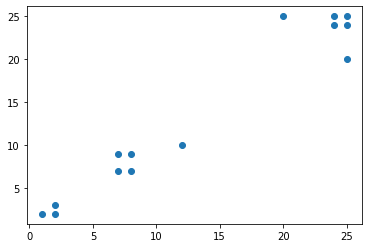

In [8]:
plt.scatter(dt[:,0],dt[:,1])
#plotting our mock dataset

In [9]:
model = KMeans(n_clusters=3)
#creating a KMeans instance

In [10]:
clusters = model.fit_predict(dt)
#fitting the model

In [11]:
clusters
#checking clusters for each datapoint

array([2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

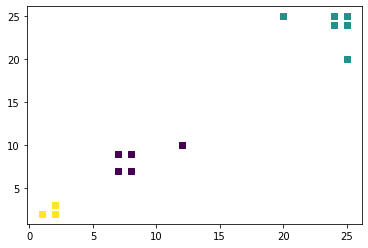

In [13]:
plt.scatter(dt[:,0],dt[:,1],c=clusters,marker='s')
#plotting data with cluster sorting

In [16]:
centroids = model.cluster_centers_
#calcuating centroid (number = number of clusters)

In [17]:
centroids

array([[ 8.4       ,  8.4       ],
       [23.83333333, 23.83333333],
       [ 1.66666667,  2.33333333]])

In [27]:
points = np.empty((0,len(dt[0])),float)
points,points.shape

(array([], shape=(0, 2), dtype=float64), (0, 2))

In [28]:
dist = np.empty((0,len(dt)),float)

In [29]:
for i,centre in enumerate(centroids):
    dist = np.append(dist,cdist([centre],dt[clusters==i],'euclidean'))
    points = np.append(points,dt[clusters==i],axis=0)
# creating distances and points wrt centroids

In [30]:
dist

array([1.45602198, 0.72111026, 1.52315462, 1.97989899, 3.93954312,
       1.1785113 , 0.23570226, 1.1785113 , 1.64991582, 4.00693843,
       4.00693843, 0.74535599, 0.47140452, 0.74535599])

In [32]:
percentile = 80
outliers = points[np.where(dist>np.percentile(dist,percentile))]
outliers

array([[12., 10.],
       [25., 20.],
       [20., 25.]])

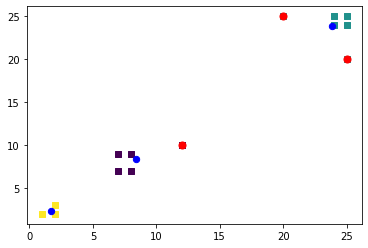

In [38]:
plt.scatter(dt[:,0],dt[:,1],c=clusters,marker='s')
plt.scatter(outliers[:,0],outliers[:,1],s=50,facecolor='r',edgecolor='r')
plt.scatter(centroids[:,0],centroids[:,1],facecolor='b',edgecolor='b',s=40)
#plotting data with outliers for each cluster

<h1>Part 2</h1>

In [39]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston

In [58]:
np.random.seed(123)
def makeDataset(n):
    x = []
    for i in range(n):
        a = i/1000 + np.random.uniform(-3,2)
        r = np.random.uniform(-5,10)
        if r>=9.9:
            r += 10
        elif r < -4.8:
            r -= 10
        x.append([a+r])
    return np.array(x)
#making another mock dataset

In [59]:
x = makeDataset(500)

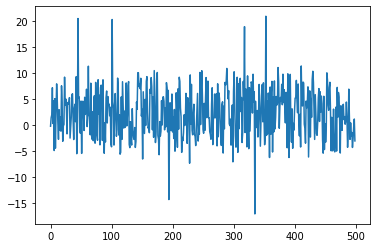

In [60]:
plt.plot(range(500),x)

In [61]:
x = scale(x)
#scaling the dataset to make Kmeans efficient

In [62]:
kmeans = KMeans(n_clusters=1).fit(x)
#creating another Kmeans instance

In [63]:
centre = kmeans.cluster_centers_
centre
#calculating centroids

array([[-1.03028697e-16]])

In [64]:
dist = np.sqrt((x-centre)**2)
sort_index=np.argsort(dist,axis=0)
index_large = sort_index[-5:]
vals_large = x[index_large]
#finding outliers by slicing largest distances from centroid

In [65]:
vals_large

array([[[ 3.48218777]],

       [[ 3.76918115]],

       [[ 3.80914366]],

       [[ 3.90096151]],

       [[-4.05640939]]])

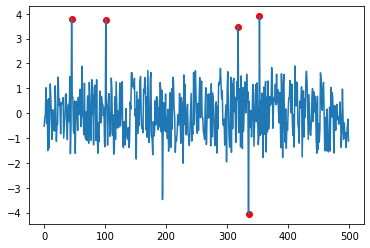

In [66]:
plt.plot(range(500),x)
plt.scatter(index_large,vals_large,color='r')
#plotting data and outliers

<h1>Part 3</h1>

In [68]:
boston_data = load_boston()
y = boston_data.target
y=y.reshape(y.shape[0],1)
y = scale(y)
#loading boston housing dataset

In [70]:
kmeans = KMeans(n_clusters=1).fit(y)
centre = kmeans.cluster_centers_
#fitting model and finding centroid

In [75]:
dist = np.sqrt((y-centre)**2)
sort_index = np.argsort(dist,axis=0)
index_large = sort_index[-20:]
val = y[index_large]
#finding outliers by slicing largest distances from centroid

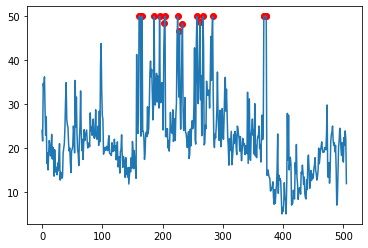

In [74]:
plt.plot(range(y.shape[0]),y)
plt.scatter(index_large,val,color='r')
#plotting data and outliers

<h1>Conclusion:</h1>
<ol>
<li>K-Means algorithm is used to detect outliers in the self generated datasets of 14 samples and 500 samples. Threshold for the detection is 80 percentile.</li>
<li>Same Algorithm is applied to Boston Housing Dataset, largets 5 distances of samples are considered as outliers. Instead of 5 largest, if largest 100 distances are considered, then more samples are detected as outliers</li>
</ol>